# Adult Census: Income Classifier
 - Theory
 - EDA 
 - PCA + LogReg
 - CrossVal 
 - Conclusion

## PCA

**Curse of Dimensionality:**<br>
High Dimensions = Sparsity of Data = Reduced Statistical Accuracy = Degraded Model<br>

**Sol'n PCA:**
Reduces Dimensions while preserving *most* Variance:
- Hyperplane Mapping (PC Creation)
    - Maximized Squared Sum of Distances (SSd) = PC
    - Avg(SSd) = Variation for PC = (SVD)EigenValue for PC
- Scree Plot
    - Determine relevant PC<sub>d</sub> satisfying variation threshold
- Map Samples to PC<sub>d</sub>
    - Reorient samples to PC dims 
     


In [4]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import os 

In [5]:
df=pd.read_csv('adult.csv')

In [6]:
# encode ? as NaN
df[df == '?'] = np.nan

In [7]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
# (workclass,nativecountry,occupation) all categorical 
# missing values
#thus, check and impute:
for col in ['workclass','native-country','occupation']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [10]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
#null, duplicate and unique val info
info = pd.DataFrame(df.isnull().sum(),columns=['IsNull'])
info.insert(1,"duplicated",df.duplicated().sum(),True)
info.insert(2,"unique",df.nunique(),True)
info.T

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
IsNull,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
duplicated,53,53,53,53,53,53,53,53,53,53,53,53,53,53,53
unique,74,8,28523,16,16,7,14,6,5,2,123,99,96,41,2


In [12]:
df.drop_duplicates(inplace=True)

In [13]:
educ = pd.DataFrame(df['education'].unique(),columns = ['edu'])
educ.insert(1,'edu-num',df['educational-num'].unique(),True)
educ.sort_values(by=['edu-num'])
df.drop(['education'],axis=1,inplace=True)

*Drop duplicate columns (education) as they do not present new information and increase bias of model towards a specific dimension type.*

In [14]:
#seperate target and feature vector:
X = df.drop(['income'],axis=1)
y = df['income']

In [15]:
#train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [16]:
#Feature Engineering

#encoding categorical variables...
from sklearn import preprocessing
cat = []
for col in df.columns:
    if ((df.dtypes[col] == 'object') & (col != 'income')):
        cat.append(col)
#...using label encoding
le = preprocessing.LabelEncoder()
for var in cat:
    X_train[var] = le.fit_transform(X_train[var])
    X_test[var] = le.transform(X_test[var])

**STD Scaler:<br> 
SUM{(xi-mean)/std} where std = SUM{((xi-mean)^2)/numof xi)}**


In [17]:
#Feature Scaling
#using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [18]:
#LogReg on full feature set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg = LogisticRegression()
#training split
lg.fit(X_train,y_train)
#testing model
y_pred = lg.predict(X_test)
#model acc
acc = accuracy_score(y_test,y_pred)
print('full feature set acc: {0:0.4f}'.format(acc))

full feature set acc: 0.8234


([<matplotlib.patches.Wedge at 0x2a4cb3ab890>,
 [Text(0.967097926867442, 0.5241389127404068, 'pc1'),
  Text(0.30950753967452627, 1.0555591328223264, 'pc2'),
  Text(-0.3001640986223377, 1.0582539930934538, 'pc3'),
  Text(-0.7971113491495634, 0.7580326490705812, 'pc4'),
  Text(-1.0671241370575388, 0.26691960607869064, 'pc5'),
  Text(-1.0657640084482547, -0.27229961126727414, 'pc6'),
  Text(-0.8191137051646857, -0.7342021097840706, 'pc7'),
  Text(-0.40589664270093934, -1.022373667229407, 'pc8'),
  Text(0.06792044676625461, -1.0979010943209195, 'pc9'),
  Text(0.5069340868394103, -0.9762263219153094, 'pc10'),
  Text(0.8386175121295544, -0.7118431486989512, 'pc11'),
  Text(1.0321658053865652, -0.3803074416714765, 'pc12'),
  Text(1.0952207880230538, -0.10242765975146213, 'pc13')],
 [Text(0.5275079601095137, 0.28589395240385823, '15.8%'),
  Text(0.1688222943679234, 0.5757595269939961, '9.3%'),
  Text(-0.16372587197582056, 0.5772294507782475, '8.6%'),
  Text(-0.43478800862703454, 0.413472354038

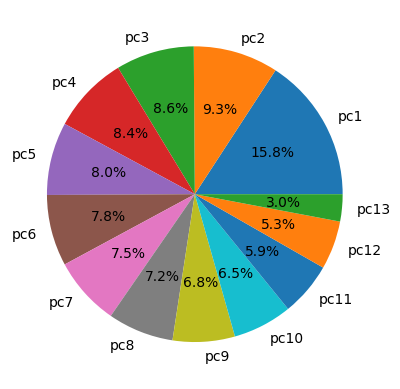

In [19]:
#using PCA to improve acc
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
#apply PCA to train split
X_train = pca.fit_transform(X_train)

l1 = (pca.explained_variance_ratio_).tolist()
lper = [x*100 for x in l1]

#pie of pc variance
labels = []
for i in range(0,len(lper)):
    labels.append('pc{}'.format(i+1))
plt.pie(lper,labels=labels,autopct='%1.1f%%')

*Assume preservation of 90% variance in samples with minimum num of dims:*


C:\Users\kandp\AppData\Local\Temp\ipykernel_9032\3547980381.py:9: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,13,1)


(0.0, 13.0)

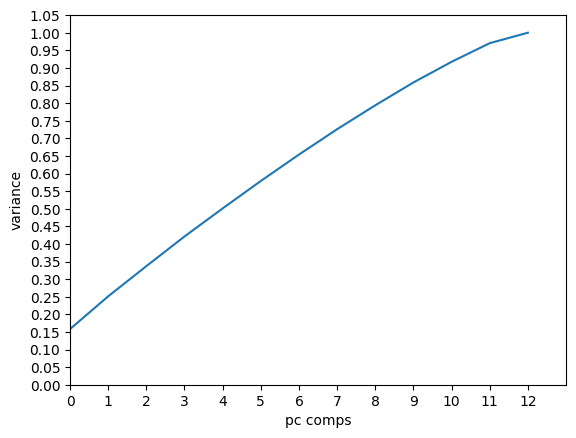

In [20]:
pca = PCA()
pca.fit(X_train)
#graph elbow curve to show relevant components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('pc comps')
plt.yticks(np.arange(0, 1.1, 0.05))
plt.xticks(np.arange(0, 13, 1))
plt.ylabel('variance')
plt.xlim(0,13,1)

*slight elbow at ~95% of variance: explained by P1-11*<br>
*thus: can drop 1 dim*

In [41]:
#thus, dropping 1 feature from feature vector
X = df.drop(df.columns[[12,13]],axis=1)
y = df[df.columns[13]]
#TTsplit
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

#obj col for le
cat = []
for col in X.columns:
    if ((X.dtypes[col] == 'object') & (col != 'income')):
        cat.append(col)
#label encoding
le = preprocessing.LabelEncoder()
for var in cat:
    X_train[var] = le.fit_transform(X_train[var])
    X_test[var] = le.transform(X_test[var])

#scaling
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X.columns)

#logreg model
lg = LogisticRegression()
#training split
lg.fit(X_train,y_train)
#testing model
y_pred = lg.predict(X_test)
#model acc
acc = accuracy_score(y_test,y_pred)
print('full feature set acc: {0:0.4f}'.format(acc))

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

full feature set acc: 0.8233
              precision    recall  f1-score   support

       <=50K       0.84      0.94      0.89     11083
        >50K       0.72      0.45      0.55      3554

    accuracy                           0.82     14637
   macro avg       0.78      0.70      0.72     14637
weighted avg       0.81      0.82      0.81     14637



### PCA/LogReg Conclusion
Thus, we have created a logreg model of 82.34% accuracy to predict a classified output which determines whether an individual (sample) in the dataset earns (less than/equal to) or (greater than) 50,000usd. 

PCA does not improve accuracy of model (0.8234 vs 0.8233)
- the distribution of variance across PC components is high: thus no clear improvement by dropping single dimension post PCA
- no definitive elbow inflection in cumulative variation plot

**Using Cross Validaton:**

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
X = df.drop(df.columns[[13]],axis=1)
y = df[df.columns[13]]
#TTsplit
seed=57
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed)

#obj col for le
cat = []
for col in X.columns:
    if ((X.dtypes[col] == 'object') & (col != 'income')):
        cat.append(col)
#label encoding
le = preprocessing.LabelEncoder()
for var in cat:
    X_train[var] = le.fit_transform(X_train[var])
    X_test[var] = le.transform(X_test[var])

#scaling
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test),columns=X.columns)

#CV
models = []
models.append(('LR',LogisticRegression()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('TR',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('RF',RandomForestClassifier(n_estimators=100,max_features=3)))
res = []
names = []
for name, model in models:
    kf = KFold(n_splits=10,shuffle=True,random_state=seed)
    cvres = cross_val_score(model,X_train,y_train,cv=kf,scoring='accuracy')
    res.append(cvres)
    names.append(name)
    op = "%s:%f(%f)"%(name,cvres.mean(),cvres.std())
    print(op)

LR:0.826628(0.004913)
KNN:0.833041(0.005578)
TR:0.814769(0.004311)
NB:0.803555(0.007342)
RF:0.859422(0.006603)
